this jupyter note book is for repetoried all the allgortyme and her explanation of how is work and who he can resolve our probleme


# **Kaczmarz Algorithm**

The Kaczmarz algorithm is an iterative method for solving systems of linear equations of the form:

$$
Ax = b
$$

Where:
- \(A\) is a matrix of size \(m \times n\),
- \(x\) is the vector of unknowns,
- \(b\) is the vector of results.

### **Mathematical Method**

Given a current estimate \(x_k\), the update for the next iteration \(x_{k+1}\) is calculated by projecting the current solution onto the hyperplane defined by the \(i\)-th row \(a_i\) of matrix \(A\). The update formula is:

$$
x_{k+1} = x_k + \frac{b_i - a_i^T x_k}{\|a_i\|^2} a_i
$$

Where:
- \(a_i\) is the \(i\)-th row of the matrix \(A\),
- \(b_i\) is the corresponding element of vector \(b\),
$$ \|a_i\|^2\ $$ 
-  is the squared norm of \(a_i\),
- \(x_k\) is the current estimate of the solution.

This formula is applied iteratively for each row of \(A\) until convergence.

### **Algorithm Explanation**:

At each iteration \(k\), the current estimate \(x_k\) is projected onto the hyperplane defined by the equation:

$$
a_i^T x = b_i
$$

The projection step is:

$$
x_{k+1} = x_k + \frac{b_i - a_i^T x_k}{\|a_i\|^2} a_i
$$

This process repeats for each row \(a_i\) of the matrix \(A\), updating the vector \(x\) until the solution converges. The stopping criterion is based on either a tolerance (a small enough difference between \(x_k\) and \(x_{k+1}\)) or a maximum number of iterations.

# **Begin of Algorithm**
need to compute this piece of code to get the value 

this work for all algortym 


In [2]:
import numpy as np

A = np.array([[1325, 5245, 123],
              [5, -44343, -400],
              [1, 408, 4]])

b = np.array([10, -2, 30])

In [3]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

In [10]:
# Random initialization of vector x
x = np.random.rand(3)

In [5]:
# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.9

### **Python Example**:

### of KacZmarz

In [11]:
# Kaczmarz algorithm
def KacZmarz(A, b, x, tolerance, max_iterations):
    for iteration in range(max_iterations):
        x_old = x.copy()  # Copy old solution
        for i, row in enumerate(A):
            dot_product = np.dot(row, x)  # Compute dot product a_i * x
            norm_squared = np.dot(row, row)  # Compute ||a_i||^2
            x = x + (b[i] - dot_product) / norm_squared * row  # Update x
        # Check for convergence
        if np.linalg.norm(x - x_old) < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    return x
# Run the algorithm
result = KacZmarz(A, b, x, tolerance, max_iterations)
print("Approximate solution:", result)

Converged after 24 iterations.
Approximate solution: [0.49999942 0.9999999  0.50000023]


### KacZmarz origanle one
Version i do by hand

In [12]:
def KacZmarz(matrice_A, matrice_b, inconnue):
    for iteration in range(max_iterations):
        x_old = inconnue.copy()  # Copie de l'ancienne solution
        for indise, equation in enumerate(matrice_A):
            transposer_a = 0
            norme = 0
            for j, element in enumerate(equation):
                transposer_a += element * inconnue[j]  # Produit scalaire de la ligne et de x
                norme += element * element  # Norme de la ligne

            # Mise à jour s²    elon l'algorithme de Kaczmarz
            atixi = (matrice_b[indise] - transposer_a) / norme
            for j, element in enumerate(equation):
                inconnue[j] = inconnue[j] + atixi * element

        # Critère de convergence (tolérance)
        if np.linalg.norm(np.array(inconnue) - np.array(x_old)) < tolerance:
            print(f"Convergence atteinte après {iteration + 1} loop.")
            break

    return inconnue

# Exécution de l'algorithme
resulte = KacZmarz(A, b, x)

print("Solution approchée:", resulte)

Convergence atteinte après 24 loop.
Solution approchée: [0.49999942 0.9999999  0.50000023]


Converged after 24 iterations.
Solution trouvée :  [0.50000117 0.99999953 0.49999977]
Vérification : A * x = [4.00000373 7.00000093 3.        ]


## kaczmarz algoryme distributed

The most performant algoryme use kaczmarz plus 

In [8]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)
print("Initial random x:", x)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Pré-calcul de la norme de chaque ligne de la matrice A (évitant de recalculer à chaque itération)
norms = np.sum(A ** 2, axis=1)


# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    # Produit scalaire entre A_row et x (A_row.dot(x))
    Transpose_a = np.dot(A_row, inconnue)

    # Mise à jour de x selon l'algorithme de Kaczmarz
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row  # Mise à jour de chaque inconnue

    return inconnue


# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)  # Initialiser une nouvelle matrice pour stocker les résultats

    # Appliquer Kaczmarz à chaque ligne de A
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])

    # Retourner la moyenne des résultats avec numpy
    return all_inconnue / len(A)


# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x_copy = x.copy()  # Initialisation des inconnues
    x_old = np.zeros_like(x_copy)  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old[:] = x_copy  # Conserver l'ancienne itération pour vérification de la convergence

        # Effectuer une itération complète sur toutes les équations
        x_copy = Kaczmarz_one_loop(x_copy)

        # Vérification de la convergence
        if convergence(x_copy, x_old):
            print(f"Convergence atteinte après {iteration + 1} itérations.")
            break

    return x_copy


# Fonction de convergence
def convergence(inconnue, x_old):
    # Vérification de la différence entre l'ancienne et la nouvelle valeur de x
    return np.linalg.norm(inconnue - x_old) < tolerance


# Exécution de Kaczmarz et vérification de la convergence
final_inconnue = Kaczmarz()

print("La solution finale (x, y, z) est :", final_inconnue)

Initial random x: [0.9084043  0.36448839 0.61544607]
Convergence atteinte après 64 itérations.
La solution finale (x, y, z) est : [0.50000294 1.00000016 0.49999592]


In [1]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)
print("Initial random x:", x)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(matrice_A, matrice_b, inconnue):
    Transpose_a = 0
    Norm = 0
    for i, A_elem in enumerate(matrice_A):
        Transpose_a += A_elem * inconnue[i]  # Produit scalaire entre a et x
        Norm += A_elem * A_elem  # Norme de a

    # Mise à jour de x selon l'algorithme de Kaczmarz
    atixi = (matrice_b - Transpose_a) / Norm
    for i, A_elem in enumerate(matrice_A):
        inconnue[i] = inconnue[i] + atixi * A_elem  # Mise à jour de chaque inconnue

    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = []

    # Appliquer KacZmarz à chaque ligne de A pour obtenir les nouvelles inconnues
    for i in range(len(A)):
        new_inconnue = Kaczmarz_one_iteration(A[i], b[i], inconnue.copy())
        all_inconnue.append(new_inconnue)

    # Calculer la moyenne des résultats avec numpy
    return np.mean(all_inconnue, axis=0)

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x_copy = x.copy()  # Initialisation des inconnues
    x_old = x_copy.copy()  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old = x_copy.copy()  # Conserver l'ancienne itération pour vérification de la convergence

        # Effectuer une itération complète sur toutes les équations
        x_copy = Kaczmarz_one_loop(x_copy)

        # Vérification de la convergence
        if convergence(x_copy, x_old):
            print(f"Convergence atteinte après {iteration + 1} itérations.")
            break

    return x_copy

# Fonction de convergence
def convergence(inconnue, x_old):
    # Vérification de la différence entre l'ancienne et la nouvelle valeur de x
    return np.linalg.norm(np.array(inconnue) - np.array(x_old)) < tolerance

# Exécution de Kaczmarz et vérification de la convergence
final_inconnue = Kaczmarz()

print("La solution finale (x, y, z) est :", final_inconnue)


Initial random x: [0.88415768 0.0165963  0.58650617]
Convergence atteinte après 138 itérations.
La solution finale (x, y, z) est : [0.5000086  0.99999299 0.49999654]


plot the how work kacZmar algo

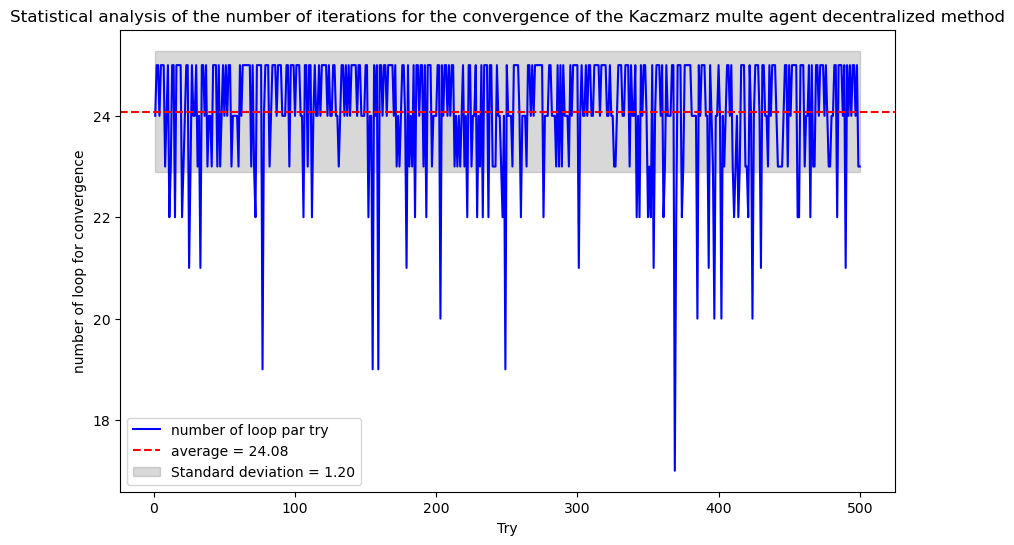

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.5  # Relaxation parameter (to be adjusted as needed)
beta = 0.1  # Momentum parameter (to be adjusted as needed)

# Pré-calcul de la norme de chaque ligne de la matrice A
norms = np.sum(A ** 2, axis=1)

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    Transpose_a = np.dot(A_row, inconnue)
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row
    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
    return all_inconnue / len(A)

# Fonction de convergence
def convergence(inconnue, x_old):
    return np.linalg.norm(inconnue - x_old) < tolerance

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x = np.random.rand(3)  # Initialisation aléatoire des inconnues
    x_old = np.zeros_like(x)  # Conserver l'ancienne version de x pour la convergence
    momentum = np.zeros_like(x)  # Pour ajouter le momentum

    for iteration in range(max_iterations):
        x_old[:] = x  # Conserver l'ancienne itération pour vérification de la convergence
        update = Kaczmarz_one_loop(x)
        
        # Ajout de relaxation et de momentum dans la mise à jour de x
        new_x = (1 - alpha) * x + alpha * update
        x = new_x + beta * momentum  # Applique le momentum
        
        # Met à jour le momentum
        momentum = x - x_old
        
        if convergence(x, x_old):
            return x, iteration + 1  # Retourner la solution finale et le nombre d'itérations

    return x, max_iterations  # Si la convergence n'est pas atteinte

# Boucle pour calculer le nombre moyen d'itérations
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne
iterations_needed = []

for _ in range(num_repetitions):
    _, iterations = Kaczmarz()  # Exécute Kaczmarz et obtient le nombre d'itérations
    iterations_needed.append(iterations)

# Calcul des indicateurs statistiques
average_iterations = np.mean(iterations_needed)
std_dev_iterations = np.std(iterations_needed)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_repetitions + 1), iterations_needed, label="number of loop par try", color='blue')
plt.axhline(average_iterations, color='red', linestyle='--', label=f"average = {average_iterations:.2f}")
plt.fill_between(
    range(1, num_repetitions + 1),
    average_iterations - std_dev_iterations,
    average_iterations + std_dev_iterations,
    color='gray', alpha=0.3,
    label=f"Standard deviation = {std_dev_iterations:.2f}"
)

# Ajout de titres et légendes
plt.xlabel("Try")
plt.ylabel("number of loop for convergence")
plt.title("Statistical analysis of the number of iterations for the convergence of the Kaczmarz multe agent decentralized method")
plt.legend()
plt.show()


## Algorithme de Gauss-Seidel distribué

In [ ]:


def has_converged(x_new, x_old, tol):
    return np.linalg.norm(x_new - x_old) < tol

# Algorithme de Gauss-Seidel distribué
def distributed_gauss_seidel(A, b, x, tolerance, max_iterations, alpha):
    n = len(b)
    x_old = np.zeros_like(x)

    for iteration in range(max_iterations):
        x_old[:] = x  # Sauvegarde de l'état précédent

        for i in range(n):  # Chaque agent résout son équation
            sum_except_i = np.dot(A[i, :], x) - A[i, i] * x[i]
            x[i] = (b[i] - sum_except_i) / A[i, i]

        # Appliquer le facteur de relaxation
        x = alpha * x + (1 - alpha) * x_old

        # Vérifier la convergence
        if has_converged(x, x_old, tolerance):
            print(f"Converged after {iteration + 1} iterations.")
            break

    return x

# Exécution de l'algorithme
x_solution = distributed_gauss_seidel(A, b, x, tolerance, max_iterations, alpha)
print("Solution trouvée : ", x_solution)

# Vérification en multipliant la solution avec A
print("Vérification : A * x =", np.dot(A, x_solution))
